# Project

In [67]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from itertools import izip
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('KS_Mobile_Calls.csv',header = None)

In [3]:
DT,cat,nr =[],[],[]

for i in range(1,len(df.index)):
    s = df[0][i].split(';')
    d,t,ty,n = s[0].split(' ')[0],s[1],s[-2],int(s[-1])
    DT.append(d+' '+t)
    cat.append(ty)
    nr.append(n)
    

In [4]:
dtemp = {'Time':DT,
        'Type':cat,
        'NumCalls':nr}

In [5]:
df=pd.DataFrame(dtemp,columns=['Time', 'Type','NumCalls'])

In [6]:
dfak = df.loc[df['Type'] == 'Mobile Faktura']

In [7]:
dfak['Time'] = pd.to_datetime(dfak.Time)


C:\Users\Wei\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
dfak2 = dfak.groupby(['Time'])['NumCalls'].sum()

In [46]:
dfak2 =pd.DataFrame(dfak2,columns = ['Time','NumCalls'])


In [47]:
del dfak2['Time']

In [48]:
df3  = dfak2['12-2013':'2-2014']

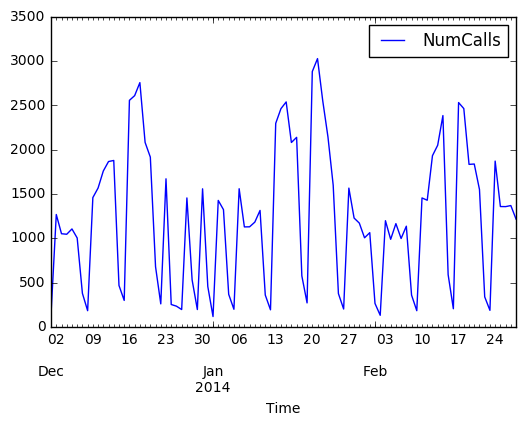

In [12]:
df3.resample('D').sum().plot()


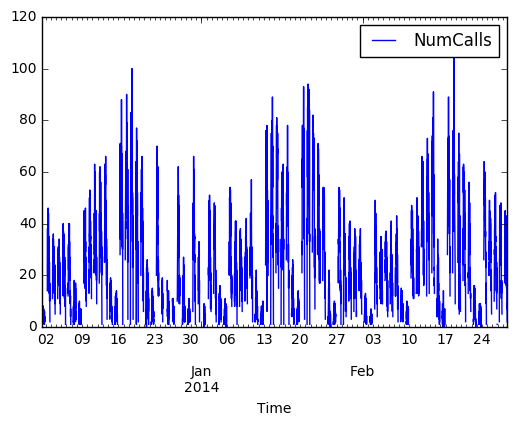

In [84]:
df3.resample('15T').sum().plot()

In [66]:
ts = dfak2

new_index = pd.date_range('1/1/2013','11/24/2016',freq = '15T')

ts = ts.reindex(new_index, fill_value=0)

ts.head()

In [111]:
ts2  = dfak2['2013':'2016'].resample('W').sum()

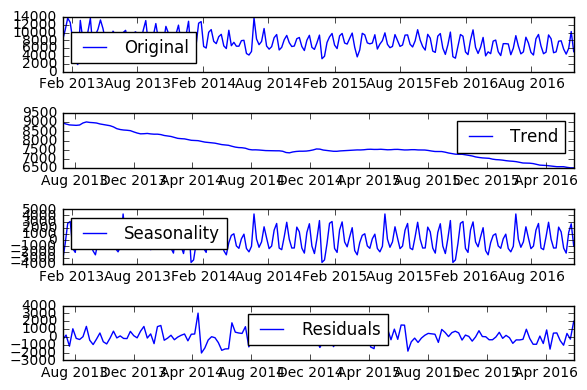

In [113]:
#May be use log scale?
#ts2_log = np.log(ts2)


decomposition = seasonal_decompose(ts2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()